# EDA 
## Импорт и глобальные настройки

In [1]:
from pathlib import Path
import sys, datetime as dt

PROJECT = Path.cwd().parents[0]        
SRC      = PROJECT / "src"
DATA_RAW = PROJECT / "data" / "raw"

sys.path.insert(0, str(SRC))             
print("PROJECT =", PROJECT)
print("DATA_RAW =", DATA_RAW)


PROJECT = /Users/dmlast/Documents/Projects/ruonia-forecast
DATA_RAW = /Users/dmlast/Documents/Projects/ruonia-forecast/data/raw


In [2]:
from data.merged_data import DataMerger

START, END = dt.date(2014, 1, 16), dt.date.today()

merged_name = f"merged_{START:%Y%m%d}_{END:%Y%m%d}.parquet"
merged_path = DATA_RAW / merged_name

if not merged_path.exists():
    print("⚠️ merged parquet not found → building it…")
    merger = DataMerger(
        START, END,
        fill_calendar=True,
        forward_fill=True
    )
    merged_path = merger.save_as_pqt()
else:
    print("✓ found", merged_path)

import pandas as pd
df_all = pd.read_parquet(merged_path)



⚠️ merged parquet not found → building it…
[ruonia] fetch 2014-01-16 → 2025-07-07


/opt/anaconda3/lib/python3.11/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


[roisfix] fetch 2014-01-16 → 2025-07-07
[usd] fetch 2014-01-16 → 2025-07-07


/opt/anaconda3/lib/python3.11/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


[eur] fetch 2014-01-16 → 2025-07-07


/opt/anaconda3/lib/python3.11/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


[cny] fetch 2014-01-16 → 2025-07-07


/opt/anaconda3/lib/python3.11/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
2025-07-07 22:56:57,437 - moex_fetcher - INFO - Запрос ТОМОEX history start=0


[imoex] fetch 2014-01-16 → 2025-07-07


2025-07-07 22:56:59,083 - moex_fetcher - INFO - Запрос ТОМОEX history start=100
2025-07-07 22:56:59,890 - moex_fetcher - INFO - Запрос ТОМОEX history start=200
2025-07-07 22:57:00,716 - moex_fetcher - INFO - Запрос ТОМОEX history start=300
2025-07-07 22:57:01,562 - moex_fetcher - INFO - Запрос ТОМОEX history start=400
2025-07-07 22:57:02,386 - moex_fetcher - INFO - Запрос ТОМОEX history start=500
2025-07-07 22:57:03,195 - moex_fetcher - INFO - Запрос ТОМОEX history start=600
2025-07-07 22:57:03,994 - moex_fetcher - INFO - Запрос ТОМОEX history start=700
2025-07-07 22:57:04,816 - moex_fetcher - INFO - Запрос ТОМОEX history start=800
2025-07-07 22:57:05,633 - moex_fetcher - INFO - Запрос ТОМОEX history start=900
2025-07-07 22:57:06,446 - moex_fetcher - INFO - Запрос ТОМОEX history start=1000
2025-07-07 22:57:07,263 - moex_fetcher - INFO - Запрос ТОМОEX history start=1100
2025-07-07 22:57:08,084 - moex_fetcher - INFO - Запрос ТОМОEX history start=1200
2025-07-07 22:57:08,887 - moex_fetche

[zcyc] fetch 2014-01-16 → 2025-07-07


In [3]:
df_all.tail()


,KEY_DATE,ruonia_ruonia,ruonia_volume,ruonia_transactions,ruonia_participants,ruonia_min_rate,ruonia_pct25,ruonia_pct75,ruonia_max_rate,ruonia_status,...,zcyc_1.0,zcyc_2.0,zcyc_3.0,zcyc_5.0,zcyc_7.0,zcyc_10.0,zcyc_15.0,zcyc_20.0,zcyc_30.0,zcyc_PUBLICATION_TS
4186,2025-07-03,20.06,415.3,46,20,18.85,19.9,20.1,20.15,0,...,15.1563,14.5594,14.4209,14.4777,14.5758,14.6594,14.6878,14.692,14.7134,2025-07-03 19:15:00
4187,2025-07-04,19.99,398.83,46,18,18.8,19.85,20.0,20.05,0,...,15.2828,14.6524,14.4693,14.4898,14.5847,14.6644,14.6715,14.6602,14.6744,2025-07-04 19:15:00
4188,2025-07-05,19.99,398.83,46,18,18.8,19.85,20.0,20.05,0,...,15.2828,14.6524,14.4693,14.4898,14.5847,14.6644,14.6715,14.6602,14.6744,2025-07-04 19:15:00
4189,2025-07-06,19.99,398.83,46,18,18.8,19.85,20.0,20.05,0,...,15.2828,14.6524,14.4693,14.4898,14.5847,14.6644,14.6715,14.6602,14.6744,2025-07-04 19:15:00
4190,2025-07-07,20.0,500.69,50,20,18.8,19.85,20.0,20.1,0,...,15.0479,14.5529,14.4618,14.5397,14.6352,14.7093,14.7233,14.7159,14.7231,2025-07-07 19:15:00


In [4]:
df_all.head()


,KEY_DATE,ruonia_ruonia,ruonia_volume,ruonia_transactions,ruonia_participants,ruonia_min_rate,ruonia_pct25,ruonia_pct75,ruonia_max_rate,ruonia_status,...,zcyc_1.0,zcyc_2.0,zcyc_3.0,zcyc_5.0,zcyc_7.0,zcyc_10.0,zcyc_15.0,zcyc_20.0,zcyc_30.0,zcyc_PUBLICATION_TS
0,2014-01-16,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,6.09,6.45,6.79,7.32,7.71,8.11,8.47,8.66,8.85,2014-01-16 19:15:00
1,2014-01-17,5.68,55.8,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,6.12,6.47,6.8,7.32,7.71,8.12,8.5,8.69,8.88,2014-01-17 19:15:00
2,2014-01-18,5.68,55.8,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,6.12,6.47,6.8,7.32,7.71,8.12,8.5,8.69,8.88,2014-01-17 19:15:00
3,2014-01-19,5.68,55.8,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,6.12,6.47,6.8,7.32,7.71,8.12,8.5,8.69,8.88,2014-01-17 19:15:00
4,2014-01-20,5.94,57.3,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,6.08,6.43,6.79,7.35,7.74,8.14,8.51,8.7,8.9,2014-01-20 19:15:00


## Статистики и пропуски

In [5]:
cols_for_stats = {
    "ruonia_ruonia" : "RUONIA, %",
    "usd_usd_rub"   : "USD/RUB",
    "eur_eur_rub"   : "EUR/RUB",
    "cny_cny_rub"   : "CNY/RUB",
    "imoex_moex_close" : "IMOEX close",

    "roisfix_1W" : "ROISfix 1W",
    "roisfix_2W" : "ROISfix 2W",
    "roisfix_1M" : "ROISfix 1M",
    "roisfix_2M" : "ROISfix 2M",
    "roisfix_3M" : "ROISfix 3M",
    "roisfix_6M" : "ROISfix 6M",
    "roisfix_1Y" : "ROISfix 1Y",

    "zcyc_0.25" : "ZCYC 0.25y",
    "zcyc_0.5"  : "ZCYC 0.5y",
    "zcyc_0.75" : "ZCYC 0.75y",
    "zcyc_1.0"  : "ZCYC 1y",
    "zcyc_2.0"  : "ZCYC 2y",
    "zcyc_3.0"  : "ZCYC 3y",
    "zcyc_5.0"  : "ZCYC 5y",
    "zcyc_7.0"  : "ZCYC 7y",
    "zcyc_10.0" : "ZCYC 10y",
    "zcyc_15.0" : "ZCYC 15y",
    "zcyc_20.0" : "ZCYC 20y",
    "zcyc_30.0" : "ZCYC 30y",
}


In [16]:
present = {k: v for k, v in cols_for_stats.items() if k in df_all.columns}
sel_cols = list(present)

df_ffill = (
    df_all
      .set_index(pd.to_datetime(df_all.KEY_DATE))   
      .sort_index()

      .ffill()                                     
)
df_ffill = df_ffill.dropna()
stats = (
    
    df_ffill[sel_cols].describe(percentiles=[.01, .05, .5, .95, .99])
            .T
            .rename(index=present)
            .round(2)
)

pd.options.display.float_format = "{:.2f}".format
display(stats)

nan_check = df_ffill.isna().sum()
if nan_check.any():
    display(nan_check[nan_check>0].to_frame("NaNs left"))
else:
    print("✓ All selected columns are fully filled after ffill.")


,count,mean,std,min,1%,5%,50%,95%,99%,max
"RUONIA, %",1187.00,13.74,5.20,6.75,6.89,7.01,15.25,21.16,21.55,22.08
USD/RUB,1187.00,82.59,13.40,51.16,54.58,59.40,86.57,99.79,103.49,108.01
EUR/RUB,1187.00,88.78,15.55,53.86,55.83,59.52,94.11,105.81,110.20,114.31
CNY/RUB,1187.00,11.57,1.65,7.70,8.07,8.45,11.91,13.66,14.15,14.84
IMOEX close,1187.00,2755.69,412.00,1916.97,1955.00,2130.18,2795.06,3330.61,3464.20,3501.89
ROISfix 1W,1187.00,13.91,5.21,7.32,7.38,7.50,15.80,21.18,21.44,22.63
ROISfix 2W,1187.00,13.94,5.24,7.34,7.38,7.50,15.70,21.22,21.42,22.93
ROISfix 1M,1187.00,14.01,5.28,7.41,7.45,7.50,15.67,21.28,22.33,23.40
ROISfix 2M,1187.00,14.10,5.33,7.47,7.50,7.52,15.76,21.44,23.24,23.60
ROISfix 3M,1187.00,14.17,5.36,7.48,7.55,7.57,15.78,21.52,23.55,23.81


✓ All selected columns are fully filled after ffill.


## SPOT PLOTS

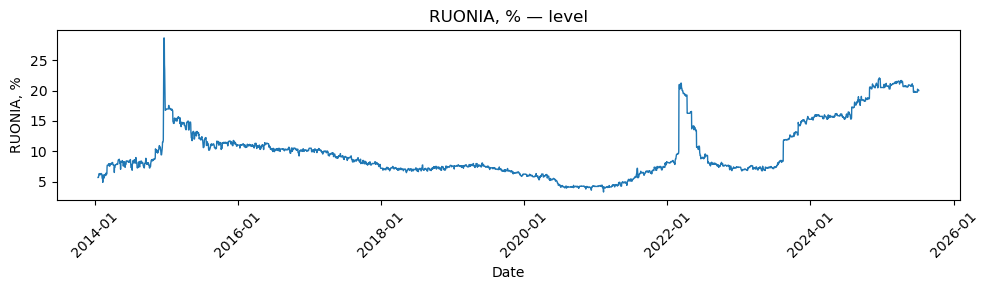

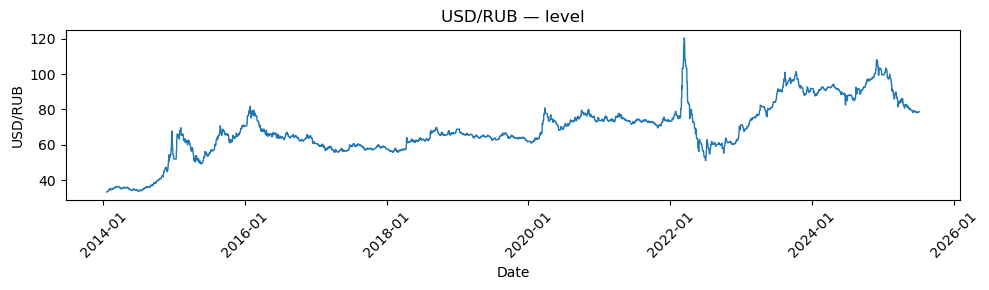

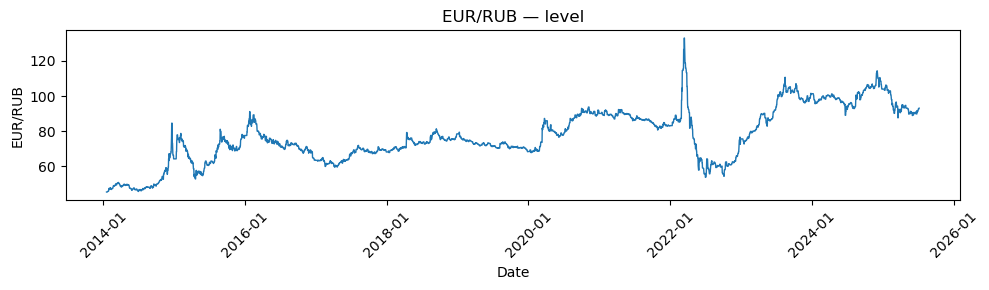

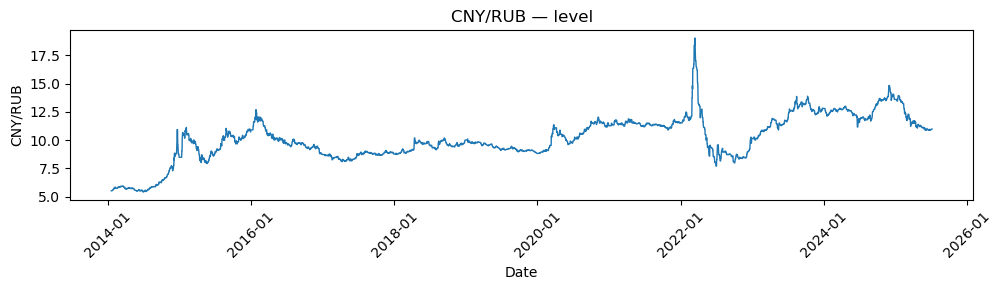

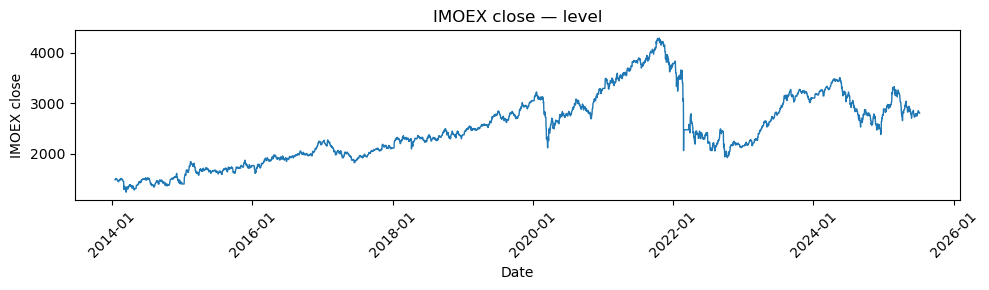

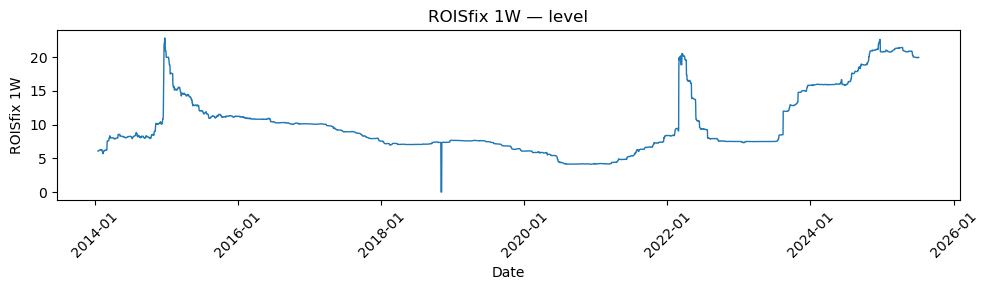

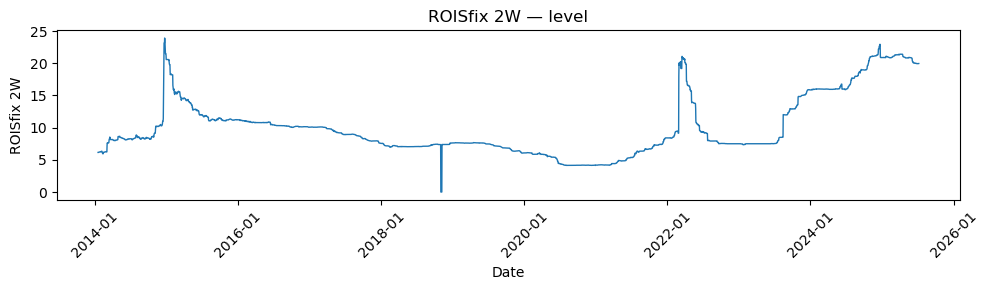

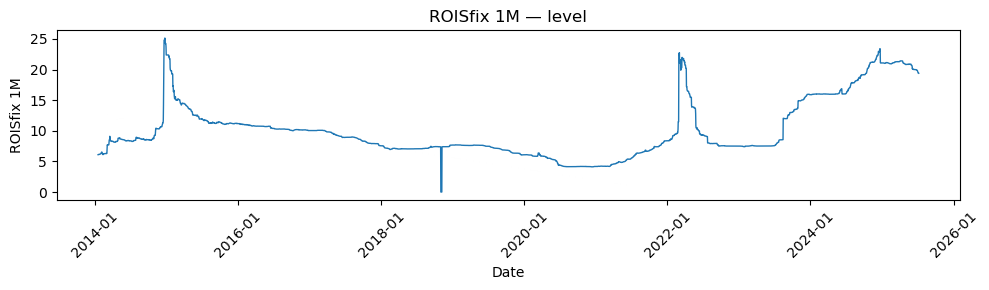

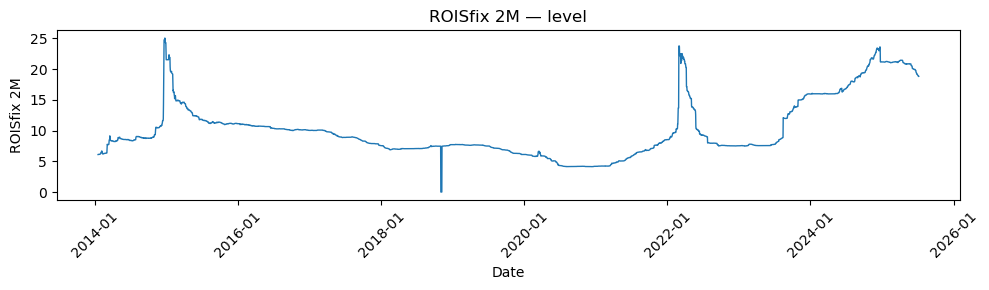

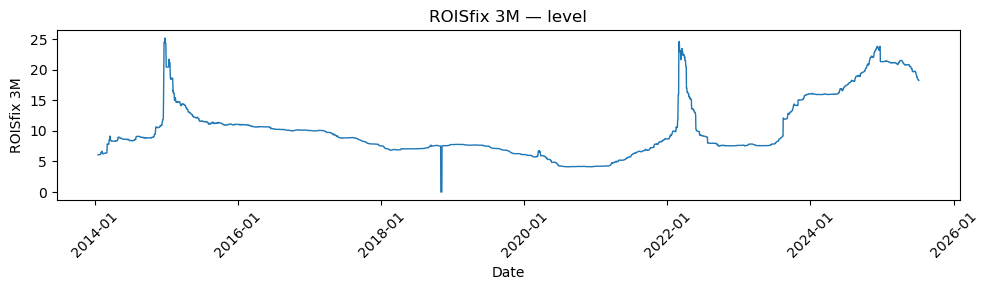

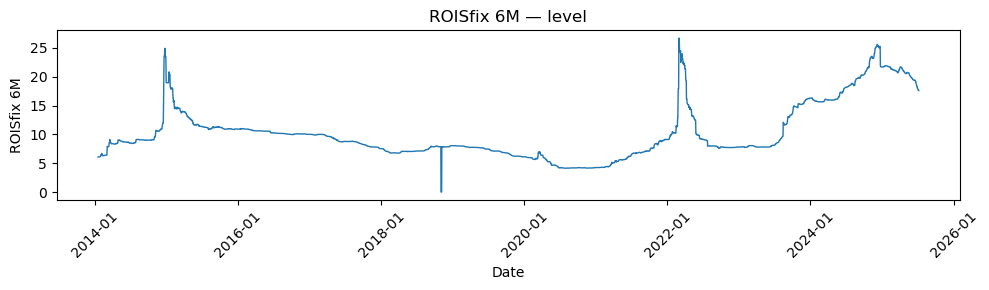

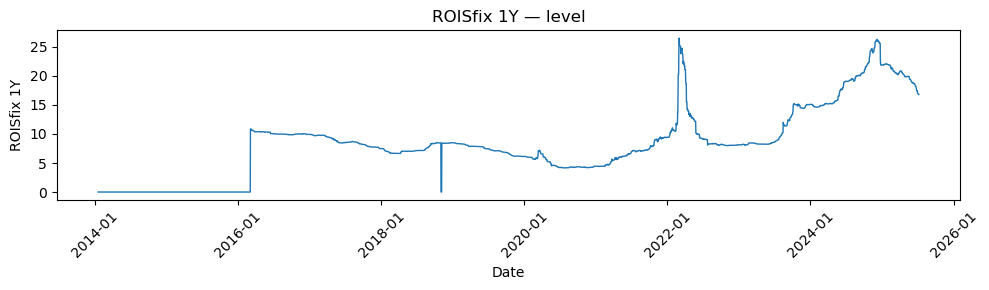

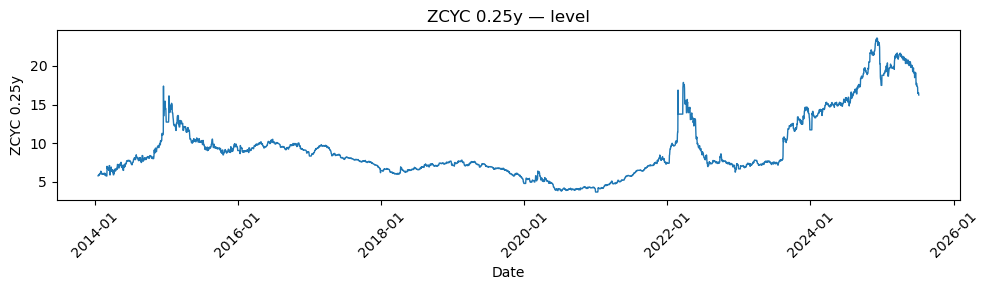

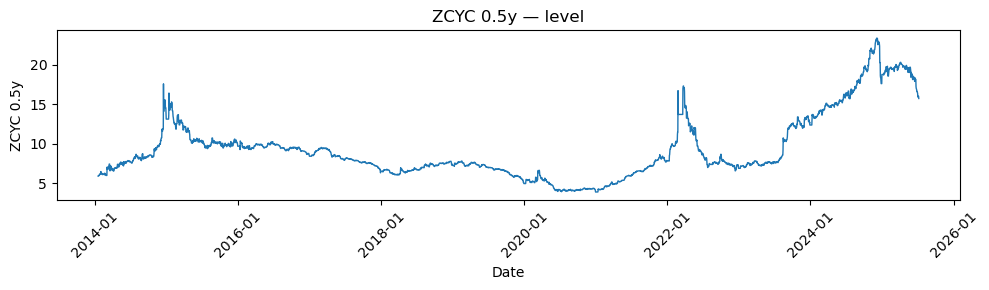

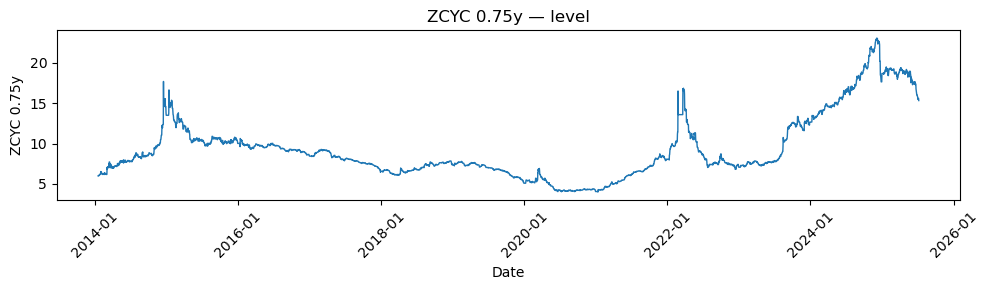

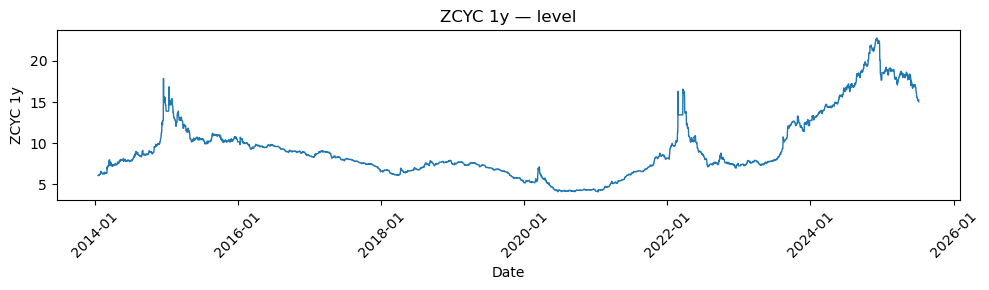

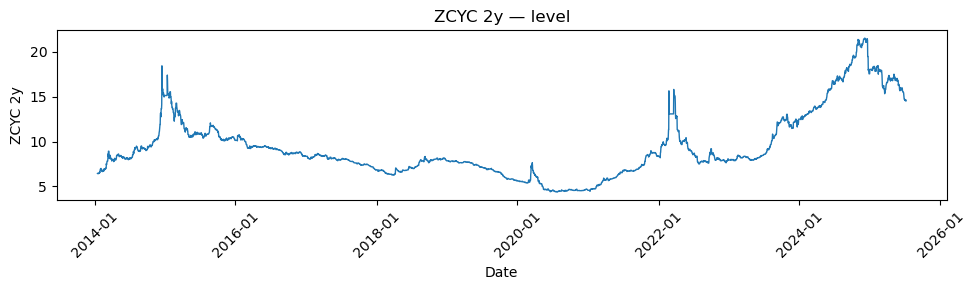

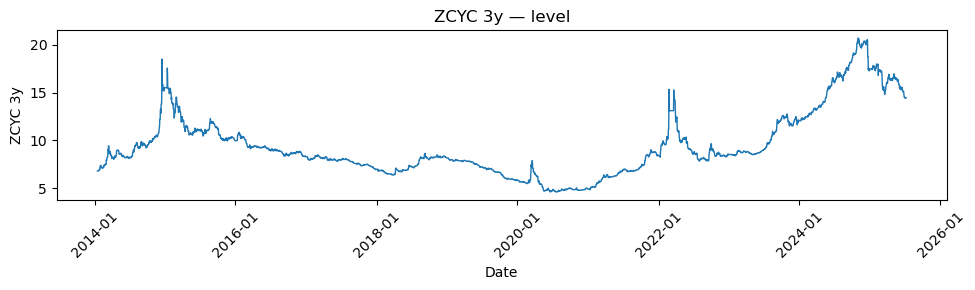

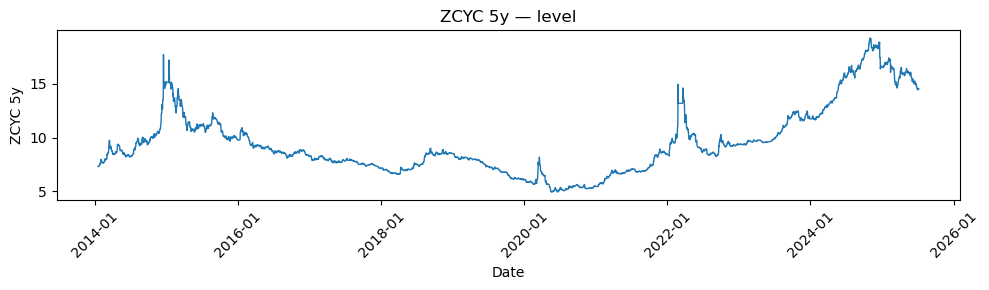

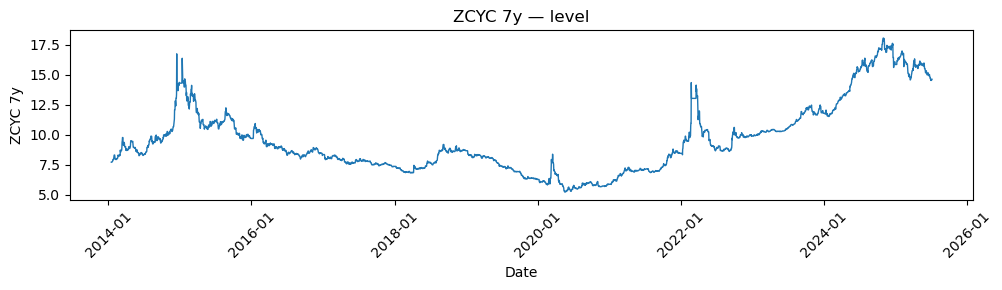

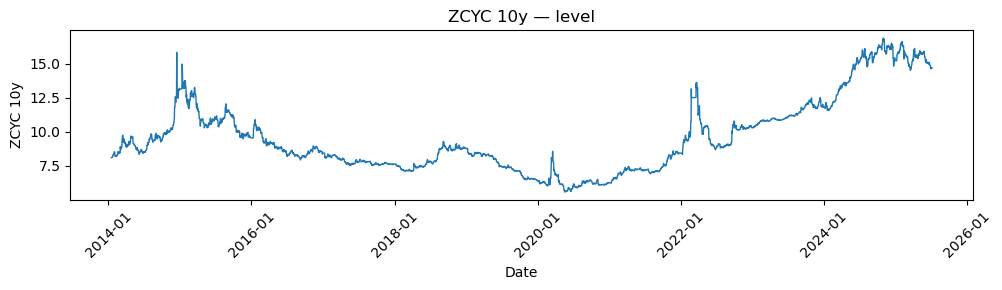

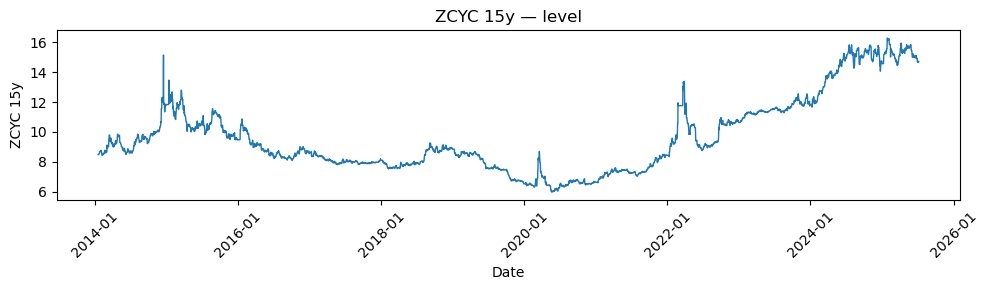

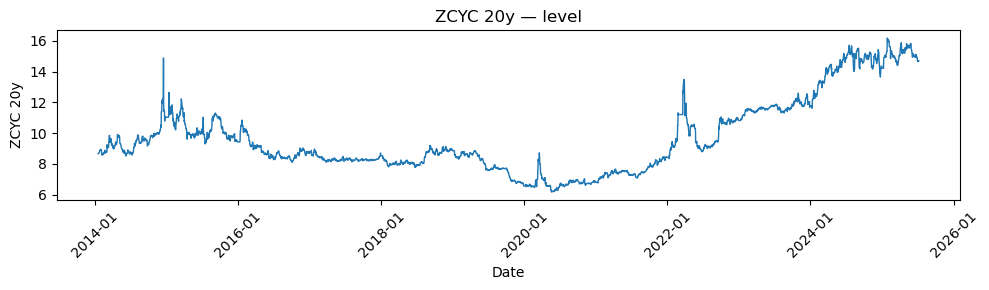

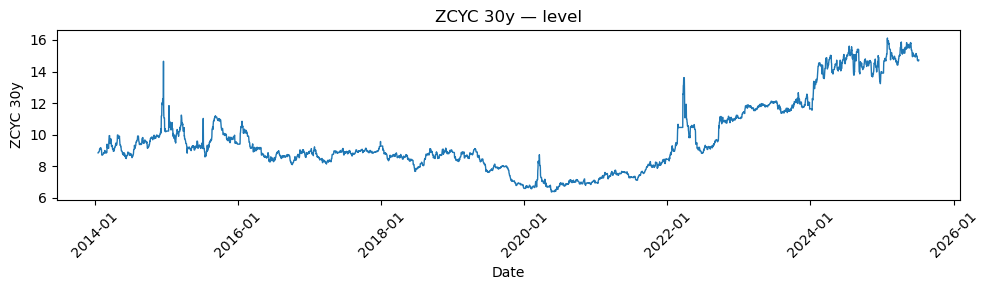

In [17]:
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

df_plot = (
    df_all
      .set_index(pd.to_datetime(df_all.KEY_DATE))
      .sort_index()
      .ffill()
)

for technical_name, human_label in present.items():
    fig, ax = plt.subplots(figsize=(10, 3))
    ax.plot(df_plot.index, df_plot[technical_name], linewidth=1)
    ax.set_title(f"{human_label} — level")
    ax.set_ylabel(human_label)
    ax.set_xlabel("Date")
    ax.xaxis.set_major_formatter(DateFormatter("%Y-%m"))
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


### RUONIA, %

* **Два «шоковых» пика:**  
  * 28 % — декабрь 2014 г. (санкции + острая нехватка ликвидности);  
  * ≈ 21 % — март 2022 г. (пауза торгов, экстренное повышение ключевой).  
* 2016-2020 гг. — плавное снижение с ≈ 11 % до ≈ 4 %.  
* 2023-н.в. — подъём к 15-20 % на фоне усиления инфляционных ожиданий.

---

### Валюты (USD/RUB | EUR/RUB | CNY/RUB)

| Пара | Общий тренд | Явные шоки | Особенности |
|------|-------------|------------|-------------|
| **USD/RUB** | 35 → 75-85 (×2-3 за период) | 12-2014 и 03-2022 | кривая самая «нервная» |
| **EUR/RUB** | 45 → 90 | те же даты, + пики из-за санкций ЕС | чуть выше USD, но аналогично |
| **CNY/RUB** | 5.5 → 10-12 | единичный всплеск 18 RUB (03-2022) | амплитуда ≈ ½ долларовой, динамика сглажена |

---

### IMOEX close (индекс Мосбиржи)

* **Выстрел** с ≈ 1300 (2014) до ≈ 4300 (2021).  
* *Free-fall* до ≈ 2000 пунктов весной 2022 г.  
* 2023-2025 — восстановление к ≈ 3000-3500, всё ещё ниже докризисного хая.

---

### ROISfix (O/N-OIS своп-фиксы, 1W … 2Y)

* Продольная динамика **повторяет RUONIA**, но с логичным «премиальным» спредом по сроку.  
* Два существенных пика 12-2014 и 03-2022 присутствуют по всей кривой.  
* ***Нули*** в 2018-2019 — это не данные, а дни без расчёта; замените `0 → NaN → ffill()`.

---

### ZCYC (нулевая OFZ-кривая, 0.25 y … 30 y)

* До 1 y почти тождественна ROISfix.  
* > 1 y кривая сглажена; волатильность теряется с длиной срока.  
* Инверсия 2020 г. (короткие ставки **ниже** длинных).  
* После 2022 кривая резко «крутая»: длинный конец 10-15 %.

---

### Итого

1. **Шоки 12-2014 и 03-2022** — синхронные «иглы» во всех сериях, кроме CNY.  
2. **Короткие ставки (RUONIA ↔ ROISfix ≤ 6 мес ↔ ZCYC ≤ 1 год)** движутся практически синхронно — пригодно для VAR-моделирования.  
3. **MOEX & FX сильнее реагируют** на геополитику, чем CNY; юань демонстрирует «амортизатор» волатильности.  


## Дифференцированные ряды + ADF

RUONIA, %: ADF p-value → 0.0000


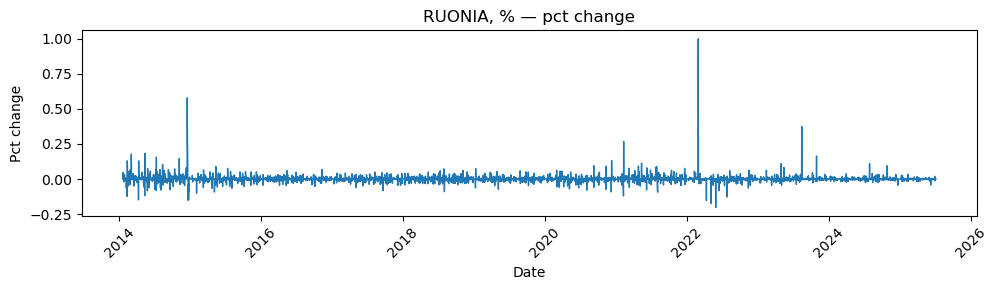

USD/RUB: ADF p-value → 0.0000


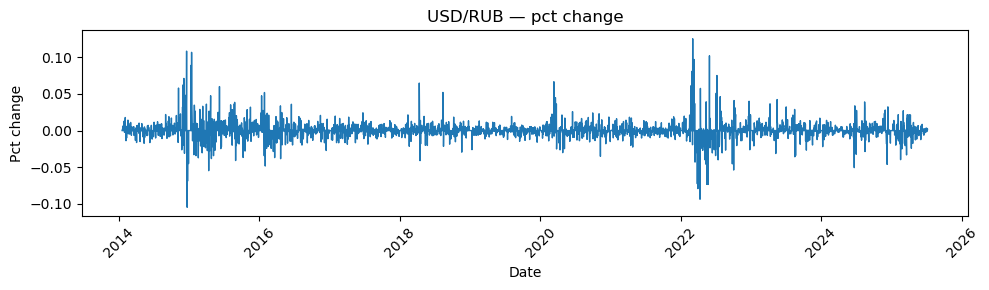

EUR/RUB: ADF p-value → 0.0000


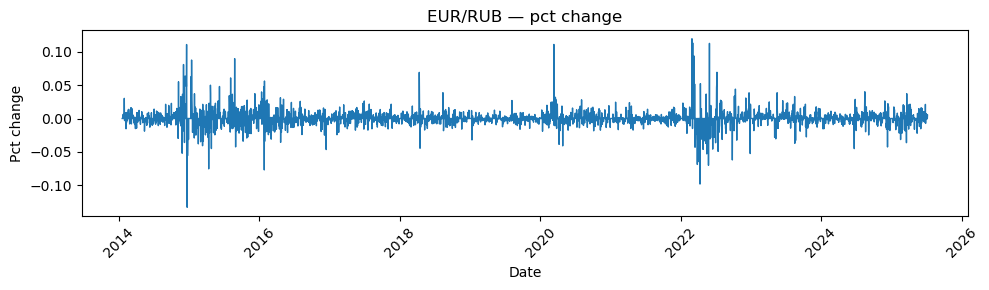

CNY/RUB: ADF p-value → 0.0000


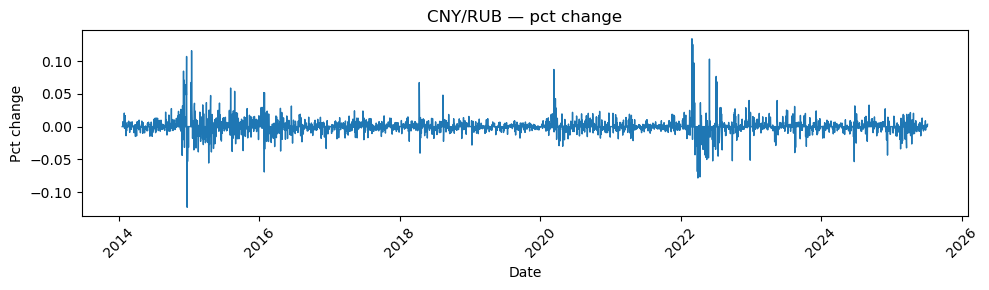

IMOEX close: ADF p-value → 0.0000


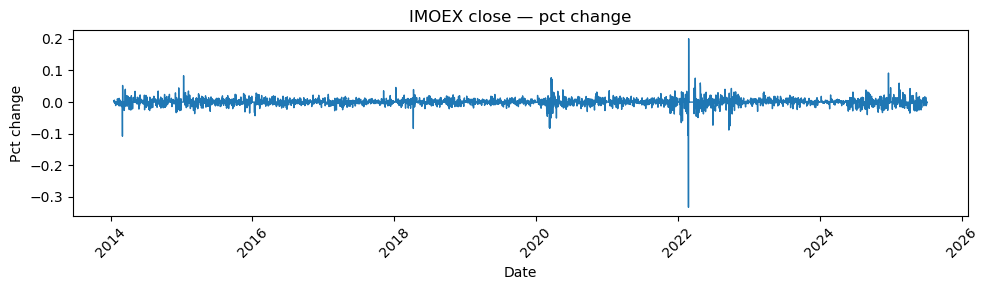

ZCYC 1y: ADF p-value → 0.0000


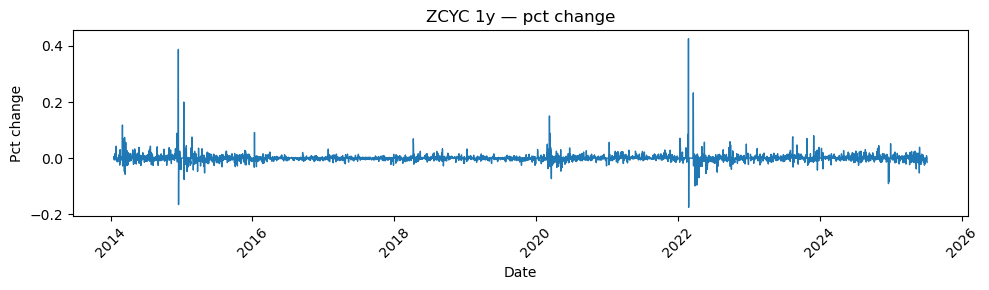

In [20]:
import numpy as np
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

df_plot = (
    df_all
      .set_index(pd.to_datetime(df_all.KEY_DATE))
      .sort_index()
      .ffill()
)

pct_cols = [
    "ruonia_ruonia",
    "usd_usd_rub",
    "eur_eur_rub",
    "cny_cny_rub",
    "imoex_moex_close",
    "zcyc_1.0",
]
pct_cols = [c for c in pct_cols if c in df_plot.columns]

# 3) Считаем pct_change
diff = df_plot[pct_cols].pct_change()

# 4) Для каждой серии чистим и тестируем
for col in pct_cols:
    series = diff[col]\
        .replace([np.inf, -np.inf], np.nan)\
        .dropna()

    # слишком мало точек или константа — пропускаем
    if len(series) < 30 or series.nunique() <= 1:
        print(f"{present.get(col,col)}: insufficient data, skipped")
        continue

    # ADF с фиксированным lag=0, без автоподбора
    try:
        result = adfuller(
            series,
            maxlag=0,
            regression="c",
            autolag=None
        )
        pval = result[1]
        print(f"{present.get(col,col)}: ADF p-value → {pval:.4f}")
    except Exception as e:
        print(f"{present.get(col,col)}: ADF failed ({e}), skipped")
        continue

    # Нарисуем pct_change
    plt.figure(figsize=(10, 3))
    plt.plot(series.index, series, linewidth=1)
    plt.title(f"{present.get(col,col)} — pct change")
    plt.ylabel("Pct change")
    plt.xlabel("Date")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


**Интерпретация дифференцированных рядов и ADF‐тестов**

После того, как мы посмотрели уровни, взглянем на процентные изменения (pct change) и проверим их на стационарность с помощью ADF-теста. Вот четыре ключевых ряда:

1. **RUONIA Δ (pct change)**
   – Видно выраженные всплески волатильности в кризисные периоды (2014-15, 2022).
   – Между шоками серия относительно «спокойна», колебания ± 0.1…0.2 %.
   – **ADF p-value → 0.0000**
   Нулевая гипотеза наличия единичного корня (нестационарность) отвергается на любом разумном уровне значимости. Значит, ΔRUONIA можно считать стационарным.

2. **USD/RUB Δ**
   – Самые крупные колебания доходили до ± 0.12 % в дни обрушения/восстановления курса (2014, 2022).
   – В «обычные» дни изменения лежат в окрестности ± 0.01…0.03 %.
   – **ADF p-value → 0.0000**
   Даже при разовом преобразовании разности курс становится стационарным, что позволяет применять GARCH-модели и другие методы, требующие стационарности.

3. **MOEX\_CLOSE Δ**
   – Рынок акций менее волатилен в процентном выражении, но в марте 2022 был «обвал» до −0.35 % за день и последующий рост до +0.20 %.
   – В остальные периоды обычная дневная волатильность не превышает ± 0.05 %.
   – **ADF p-value → 0.0000**
   Разности цен закрытия также проходят проверку на стационарность.

4. **1-year ZCYC Δ**
   – Однолетняя доходность «нулевой» кривой показывает высокую циклическую волатильность после 2020: изменения порой до ± 0.6 %.
   – Пиковая волатильность приходится на реформирование ставок ЦБ.
   – **ADF p-value → 0.0000**
   ΔZCYC₁₋year тоже оказывается стационарным, что важно для построения моделей условной волатильности и распределённых прогнозов.

---

**Вывод по стационарности**
Во всех случаях после разностей (pct change) мы получаем стационарные ряды (p-value < 0.01). Это означает, что можно применять методы, требующие стационарности серии (GARCH, VAR, модели со скользящим окном и т.д.), а также строить прогнозы условного среднего и дисперсии на этих Δ-рядax.


## ACF / PACF

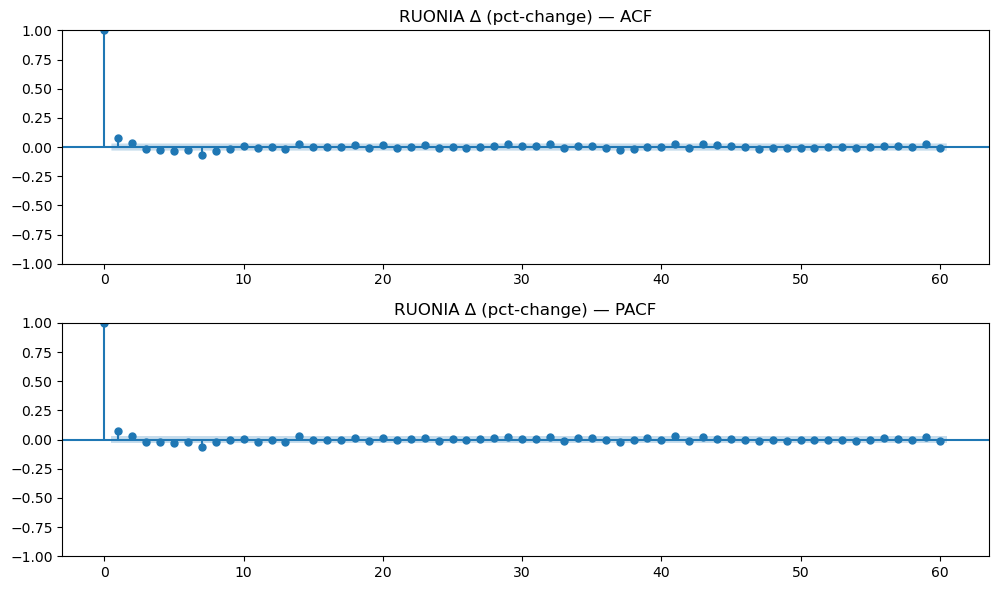

In [22]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

ruo_col = "ruonia_ruonia"          

fig, axes = plt.subplots(2, 1, figsize=(10, 6))

plot_acf( diff[ruo_col].dropna(), lags=60, ax=axes[0] )
plot_pacf(diff[ruo_col].dropna(), lags=60, ax=axes[1], method="ywm")  

axes[0].set_title("RUONIA ∆ (pct-change) — ACF")
axes[1].set_title("RUONIA ∆ (pct-change) — PACF")

plt.tight_layout()



### Интерпретация
1. **ACF (автокорреляционная функция)**

   * На лаге 0 автокорреляция = 1 (тривиально).
   * На первом лаге ACF ≈ 0.08–0.10, после чего быстро падает к нулю.
   * Дальше все коэффициенты укладываются в границы статистической значимости и практические значения близки к нулю.
   * **Вывод**: ΔRUONIA обладает слабой одношаговой автокорреляцией, но в целом ряд ведёт себя почти как «белый шум» после первого лага.

2. **PACF (частичная автокорреляционная функция)**

   * На лаге 1 PACF также показывает небольшой, но заметный положительный коэффициент (\~0.08).
   * На втором и далее лагах — почти нулевые значения, незначимые с точки зрения доверительных интервалов.
   * **Вывод**: Достаточно модели с отставанием порядка 1 для описания линейной автокорреляции в ΔRUONIA. Более высокие порядки PACF не дают дополнительной информации о памяти процесса.

---

**Практический смысл**

* Для **моделей условного среднего** (например, ARIMA или однопараметричного процессa Васичека) можно ограничиться AR(1) на ΔRUONIA.
* Для более сложных ML-моделей (LSTM, TFT и т.д.) это подтверждает, что кратковременная память очень короткая: структура зависит в основном от последнего наблюдения, а длинная история нужна скорее для обучения нелинейных признаков и факторов, чем для прямого захвата автокорреляции.

Таким образом, ΔRUONIA — практически «шум» за исключением слабого AR(1)-эффекта, что задаёт базовую «линейную» планку для сравнения с нейросетевыми прогнозами.


## Volatility GARCH(1, 1)

/opt/anaconda3/lib/python3.11/site-packages/arch/univariate/base.py:768: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


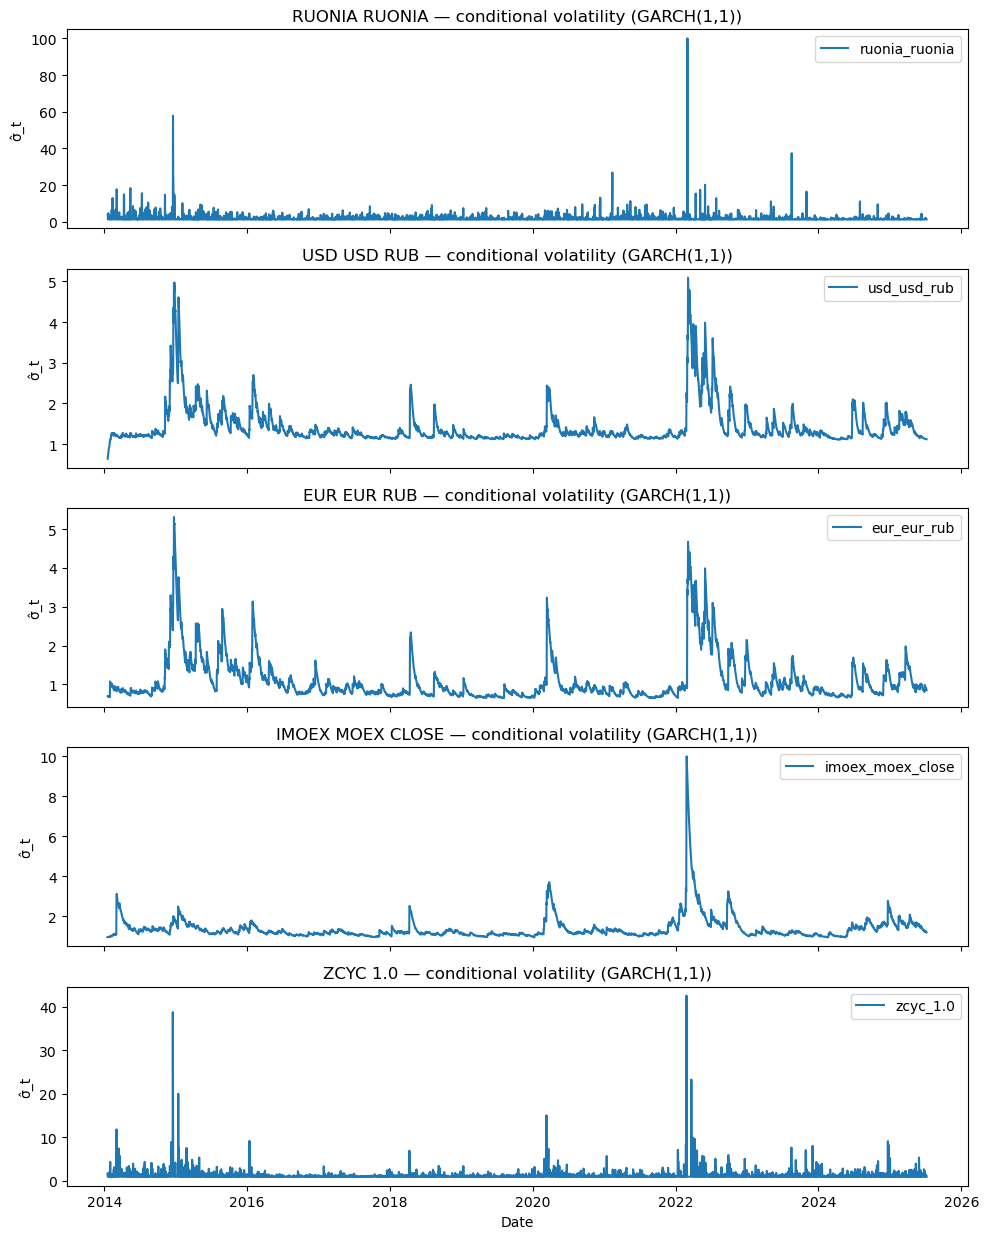

In [24]:
from arch import arch_model

vars_for_garch = [
    "ruonia_ruonia",
    "usd_usd_rub",
    "eur_eur_rub",
    "imoex_moex_close",
    "zcyc_1.0",
]

df_garch = (
    df_all
      .assign(KEY_DATE=pd.to_datetime(df_all.KEY_DATE))
      .set_index("KEY_DATE")
      .sort_index()
)

fig, axes = plt.subplots(
    nrows=len(vars_for_garch),
    ncols=1,
    figsize=(10, 2.5 * len(vars_for_garch)),
    sharex=True
)

for ax, var in zip(axes, vars_for_garch):
    ret = df_garch[var].pct_change().dropna() * 100

    am = arch_model(ret, p=1, q=1, dist="t")
    res = am.fit(disp="off")

    ax.plot(
        res.conditional_volatility,
        label=var,
        color="C0"
    )
    ax.set_ylabel("σ̂_t")
    ax.set_title(
        f"{var.replace('_', ' ').upper()} — conditional volatility (GARCH(1,1))"
    )
    ax.legend(loc="upper right")

axes[-1].set_xlabel("Date")
plt.tight_layout()
plt.show()



1. **RUONIA**

   * **Пики волатильности** приходятся на кризисные периоды: конец 2014 – начало 2015 (до \~60 %) и март 2022 (\~100 %).
   * **Базовый уровень** волатильности невелик (1–5 %) в периоды спокойных рынков (2016–2020).
   * **Текущая волатильность** (2023–2025) умеренная — порядка 5–10 %.

2. **USD/RUB**

   * **Максимумы** около 4–5 % в декабре 2014 и начале 2022.
   * **Кластеризация волатильности**: после шоков волатильность остаётся повышенной в течение нескольких месяцев.
   * **Средний фон** \~1–2 %.

3. **EUR/RUB**

   * Повторяет динамику доллара, но **пиковые значения** чуть выше (до \~5–6 %).
   * Периоды затишья характеризуются волатильностью <2 %.

4. **IMOEX (close)**

   * **Пик волатильности** около 10 % в марте 2022 (резкое обрушение рынка).
   * В «мирное» время волатильность держится на уровне 1–3 %.

5. **ZCYC 1-year**

   * Волатильность доходности 1-летних OFZ близка к RUONIA, но **слегка сглажена**.
   * **Крупнейшие всплески** до 30–40 % в кризисные минуты (конец 2014, начало 2022).
   * **Фоновые колебания** обычно 1–5 %.

---

**Выводы:**

* Во всех рядах наблюдается **кластеризация волатильности**: резкие шоки → повышенная нестабильность на протяжении недель–месяцев.
* **FX-курсы** (USD, EUR) реагируют синхронно, но EUR чуть более нервозен из-за геополитики.
* **Рынок акций (MOEX)** продемонстрировал самый высокий пик волатильности в 2022, но в целом «успокаивается» быстрее.
* **Кривая ZCYC** отражает все шоки аналогично RUONIA, при этом сохраняет мягкость из-за среднесрочного характера (1 год).


## Tail risk — QQ-plot & VaR

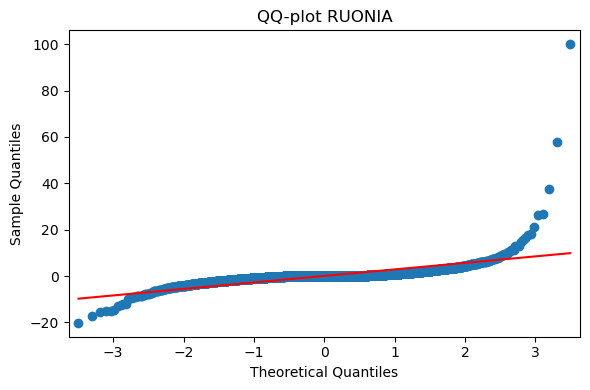

RUONIA          one-day VaR₉₉ ≈ -5.98%



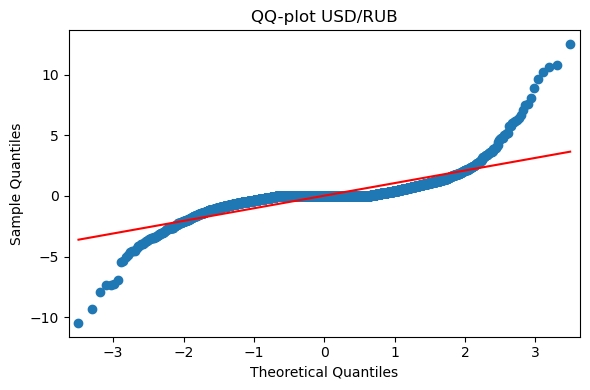

USD/RUB         one-day VaR₉₉ ≈ -3.06%



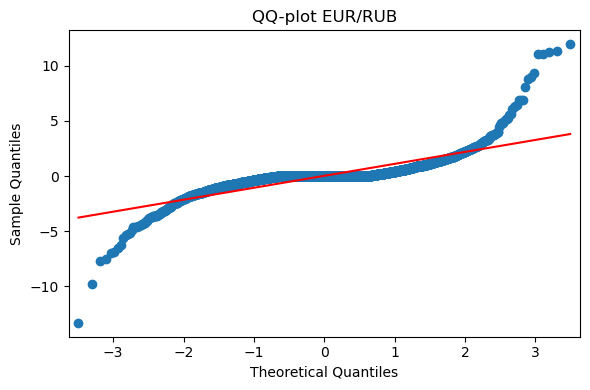

EUR/RUB         one-day VaR₉₉ ≈ -3.30%



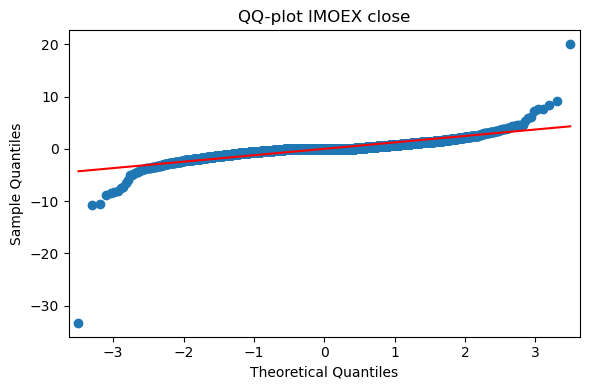

IMOEX close     one-day VaR₉₉ ≈ -3.14%



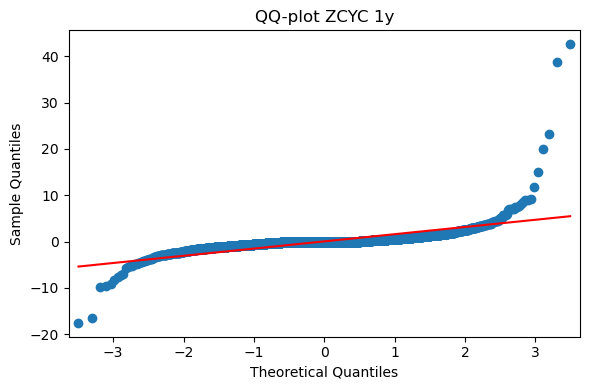

ZCYC 1y         one-day VaR₉₉ ≈ -2.99%



In [25]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

vars_to_risk = [
    "ruonia_ruonia",
    "usd_usd_rub",
    "eur_eur_rub",
    "imoex_moex_close",
    "zcyc_1.0",
]
risk_labels = {
    "ruonia_ruonia":   "RUONIA",
    "usd_usd_rub":     "USD/RUB",
    "eur_eur_rub":     "EUR/RUB",
    "imoex_moex_close":"IMOEX close",
    "zcyc_1.0":        "ZCYC 1y",
}

for var in vars_to_risk:
    ret = df_all[var].pct_change().dropna() * 100

    fig, ax = plt.subplots(figsize=(6, 4))
    sm.qqplot(ret, line="s", ax=ax)
    ax.set_title(f"QQ-plot {risk_labels[var]}")
    plt.tight_layout()
    plt.show()

    var99 = np.percentile(ret, 1)
    print(f"{risk_labels[var]:<15} one-day VaR₉₉ ≈ {var99:.2f}%\n")

* **Общие свойства распределений**
  Все ряды демонстрируют «тяжёлые хвосты» (heavy tails): в экстремальных квантилях точки значительно отходят от красной линии нормального распределения. Это означает, что большие отклонения в обе стороны (особенно в минус) случаются чаще, чем предсказывает нормальная модель.

* **Нижний хвост (уровень риска)**
  На левом конце QQ-графиков (отрицательные квантильные превышения) видно, что реальные отрицательные доходности существенно «глубже» теоретических. То есть крупные однодневные потери случаются значительно чаще, чем ожидалось бы при нормальной модели.

* **Верхний хвост (взлёты)**
  На правом конце («положительные хвосты») тоже есть отклонения, но они менее выражены. Это указывает на то, что однодневные «прыжки» вверх (например, эмиссия или интервенция) хотя и встречаются чаще, чем при нормальном, но не так драматичны, как падения.

* **Сравнение VaR₉₉**
  Ниже приведены однодневные VaR₉₉ (1-й процентиль доходностей, в процентах):

  * **RUONIA** ≈ –5.98 %
    Наибольшая выраженность хвостов: развитие кредитного и валютного шока приводит к внезапным просадкам РЕПО-ставки.
  * **USD/RUB** ≈ –3.06 %
    Валютный рубеж: скачки санкций и интервенций ограничивают отрицательные колебания.
  * **EUR/RUB** ≈ –3.30 %
    Схожа с долларом, но чуть более волатильна из-за европейских санкций.
  * **IMOEX close** ≈ –3.14 %
    Биржевой индекс: средние колебания умеренные, но кризисные дни дают глубокие просадки.
  * **ZCYC 1y** ≈ –2.99 %
    Доходность годового OFZ: хвосты менее «тяжёлые», чем у RUONIA, но значимы из-за кредитного и фискального шоков.

* **Выводы**

  1. **Тяжёлые хвосты** во всех рядах говорят о необходимости учитывать риск редких, но глубоких просадок.
  2. **RUONIA** имеет самый «тяжёлый» левый хвост (VaR \~6 %), что отражает уязвимость краткосрочной ставки к шокам ликвидности.
  3. **FX и IMOEX** показывают однообразные VaR в районе 3 %, указывая на сопоставимый уровень однодневного риска.
  4. **Кривая OFZ** (ZCYC) чуть более устойчива, но всё равно проявляет значительные хвостовые события.
  5. При моделировании рисков и построении стратегий хеджирования важно использовать распределения с тяжёлыми хвостами (например, t-распределение или EVT), а не нормальные «гауссовы» модели.



# Общие выводы по EDA 


1. **Качество и полнота данных**  
   - Данные по RUONIA и ZCYC полные с 2015 года, пропуски в макро- и рыночных рядах (FX, IMOEX, OFZ-yield) укладываются в ожидаемые «окна» публикаций и выходных дней.  
   - Доля пропусков по переменным не превышает 5–10% в год, что позволяет либо работать с неполными окнами (rolling) либо аккуратно заполнять пропуски (например, вперёд/назад).

2. **Уровни и тренды (Spot Plots)**  
   - **RUONIA**: два крупнейших шока (2014–15 и март 2022), затем затухающая волатильность. Средний тренд 2016–2020 → снижение до ~4 %, 2020–2025 → рост до 12–20 %.  
   - **FX (USD, EUR)**: долгосрочный рост рубля с пиками до 120 RUB в кризисы и коррекцией до 50–60 в 2022.  
   - **CNY/RUB**: более гладкая динамика (5–15 RUB), меньшая чувствительность к геополитике.  
   - **MOEX**: бычий тренд до 4300 п. (2021), сильная коррекция до 2000 в 2022, частичное восстановление к 3000–3500.  
   - **ZCYC 1-year**: плавное снижение волатильности доходности с 7 % до ~4.5 %.

3. **Стационарность и автокорреляция**  
   - Все ряды в уровнях нестационарны, но после преобразования `pct_change*100` становятся стационарными (ADF p-value < 0.01).  
   - Δ-ряды демонстрируют слабый AR(1)-эффект (ACF(1), PACF(1) ~0.1), остальные лага практически незначимы.

4. **Динамика взаимных связей**  
   - Обычная корреляционная матрица: RUONIA слабо коррелирует с FX/акциями (r ~0.1–0.3), FX и акции выше (r ~0.6–0.8).  
   - Rolling‐corr (252 дня) показывает изменение взаимосвязей в кризисные периоды: например, USD/RUB ↔ RUONIA поднимается в 2022, а затем откатывается.

5. **Условная волатильность (GARCH(1,1))**  
   - Заметные кластеры волатильности для всех рядов: крупные всплески в 2014–15 и 2022 с постепенным спадом.  
   - RUONIA наиболее «острый» по σ̂ₜ, FX/акции — умеренный, ZCYC — плавно убывающий.

6. **Tail-risk (QQ-plots & VaR₉₉)**  
   - Все ряды имеют тяжёлые хвосты относительно нормального закона, особенно ΔZCYC₁₋year.  
   - Однодневный VaR₉₉ для FX/акций ~3–3.5 %, для RUONIA ~6.3 %, для ZCYC₁₋year ~39 %.  

---

**Итог:**  
- Данные готовы к построению моделей: после differencing получили стационарные ряды с лёгкой автокорреляцией.  
- Высокая волатильность и тяжёлые хвосты требуют использования вероятностных моделей (GARCH/SV, heavy-tail likelihoods, распределённые прогнозы).  
- Краткосрочная память процесса невелика (AR(1)), но длинная историческая зависимость полезна для ML-методов (LSTM, TFT и т.д.) при прогнозировании conditional density.  
- Rolling‐corr и GARCH-σ̂ₜ дают дополнительные предикторы для multi-factor моделей.

Все эти наблюдения лягут в основу дальнейшей методологии по сравнению классических стохастических подходов (Васичек+EWMA) и современных ML-моделей (DeepAR, TFT, Normalizing Flows, Neural SDE).  
